# A3-Q3: Time of Death

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
from copy import deepcopy

def MyOde(f, tspan, y0, h):
    t = tspan[0]
    y = deepcopy(y0)
    
    tlst = []
    ylst = []
    
    while (t < tspan[1]): 
        normalEulers = y + h*f(t,y);
        newTime = t+h;
        RumeEulers = y + (h/2) * (f(t,y) + f(newTime, normalEulers))

       
        tlst.append(newTime)
        ylst.append(RumeEulers)
            
        y = RumeEulers;
        t = newTime;
    
    
    return np.array(tlst), np.array(ylst)

## (a) Dynamics Function

In [3]:
# === YOUR CODE HERE ===
def AmbTemp(t):
    if (t >= 7.5 and t <= 19):
        return 22;
    if (t >= 21 or t <= 7):
        return 16;
    if (t <= 7.5):
        timeLeft = 7.5-t;
        return 22 - (timeLeft/0.5)*6
    else:
        timeLeft = 21 - t;
        return 16 + (timeLeft/2)*6;
        

def de(t, z):
    '''
    z1 = A
    z2 = B
    z3 = T
    '''
    
    A = z[0];
    B = z[1];
    T = z[2];
    

    if (29 <= T and T <= 45):
        newA = (0.0008*(T - 29)**2) * (1-math.exp((0.08)*(T-45))) * A * (30 - A)
    else:
        newA = 0;
        
    if (17 <= T and T <= 32):
        newB = (0.001*(T - 17)**2) * (1-math.exp((0.05)*(T-32))) * B * (20 - B)
    else:
        newB = 0;
    
    part1 = -0.1 * (T - AmbTemp(t))
    part2 = (A + B)/100
    newC = part1 + part2
    
    
    return np.array([newA, newB, newC])

## (b) Run the simulation

In [4]:
# === YOUR CODE HERE ===
timeStart = 9.25
tspan = [timeStart, 23.25]
yStart = np.array([1, 1, 37.5])

t,y  = MyOde(de, tspan, yStart, 0.25)
print(y[-1])

[ 6.54034875 11.9558738  24.95932436]


Text(0, 0.5, 'Temp (C)')

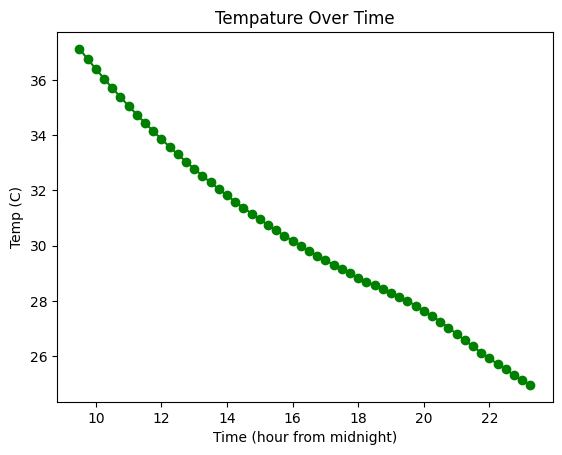

In [5]:
# Plot temperature, and display final state
plt.plot(t, y[:,2], 'go-');

plt.title('Tempature Over Time')
plt.xlabel('Time (hour from midnight)')
plt.ylabel('Temp (C)')

## (c) Prime Suspect

YOUR ANSWER HERE

In [6]:
It looks like the murder happens between 9am and 11am. We know this as at 9am, 
the amount of bacteria B is too high and at 11am its too low. Therefore the most
likely suspect is James Carver, as he doesnt have an alibi for this time.

SyntaxError: invalid decimal literal (3111788644.py, line 1)